In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import kernel_ridge

## Import Data Set

In [2]:
# Get naive and actual occupancy percentage data
X_data = pd.read_csv('./data/X_data.csv')
X_data = np.array(X_data.values.tolist())
X_data = X_data[:,3]
print('Naive occupancy')
print(X_data[0:10])

Y_data = pd.read_csv('./data/Y_data.csv')
Y_data = np.array(Y_data.values.tolist())
Y_data = Y_data[:,1]
print('Actual occupancy')
print(Y_data[0:10])

Naive occupancy
[0.286 0.286 0.321 0.321 0.321 0.321 0.321 0.357 0.357 0.357]
Actual occupancy
[0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75]


In [3]:
# Group data to day snapshot
X_data = np.reshape(X_data, (84,720))
print('Naive occupancy')
print(X_data.shape)
print(X_data[0][:10])


Y_data = np.reshape(Y_data, (84,720))
print('Actual occupancy')
print(Y_data.shape)
print(Y_data[0][:10])

Naive occupancy
(84, 720)
[0.286 0.286 0.321 0.321 0.321 0.321 0.321 0.357 0.357 0.357]
Actual occupancy
(84, 720)
[0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75]


In [4]:
# Get block names label for each of X/Y data
block_names = pd.read_csv('./data/block_names.csv')
block_names = np.array(block_names.iloc[:,1])
block_names = np.reshape(block_names, (12,7))
print(block_names[0])

['11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/21'
 '11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/22'
 '11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/23'
 '11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/24'
 '11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/25'
 '11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/26'
 '11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/28']


In [5]:
# Group data into blocks
blocks_X = np.reshape(X_data, (12,7,720))
blocks_Y = np.reshape(Y_data, (12,7,720))
print(blocks_X[0,0,:10])
print(blocks_Y[0,0,:10])

[0.286 0.286 0.321 0.321 0.321 0.321 0.321 0.357 0.357 0.357]
[0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75]


## Ridge Regression with Gaussian Kernel

In [6]:
lambda_val = 0.1
gamma = 0.01

rrg = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)

In [7]:
def cross_validate(rrg, X, Y, block_names):     
    n = len(X)
    error = 0
    naive_error = 0
    time = np.arange(720)
    plt.figure(figsize=(20,14))
    
    for i in range(n):
        plt.subplot(3, 3, i+1)
        x_train = np.delete(X, i, 0)
        y_train = np.delete(Y, i, 0)
        x_test = X[i]
        y_test = Y[i]
        rrg.fit(x_train, y_train)
        y_predicted = rrg.predict(x_test.reshape(1, -1))[0]
        plt.plot(time, y_predicted, color='r', label='Prediction')
        plt.plot(time, X[i], color='g', label='Naive')
        plt.plot(time, Y[i], color='b', label='Actual')
        plt.legend()
        plt.xlabel('Time (min since 8:00 am)')
        plt.xticks(np.arange(0,780,60))
        plt.ylabel('Occupancy Percentage')
        plt.title(block_names[i])
        error += np.mean(np.abs(y_test-y_predicted))
        naive_error += np.mean(np.abs(Y[i]-X[i]))
    
    plt.tight_layout()
    plt.show()
    print("Prediction Error: ")
    print(error/n)
    print("Naive Error: ")
    print(naive_error/n)

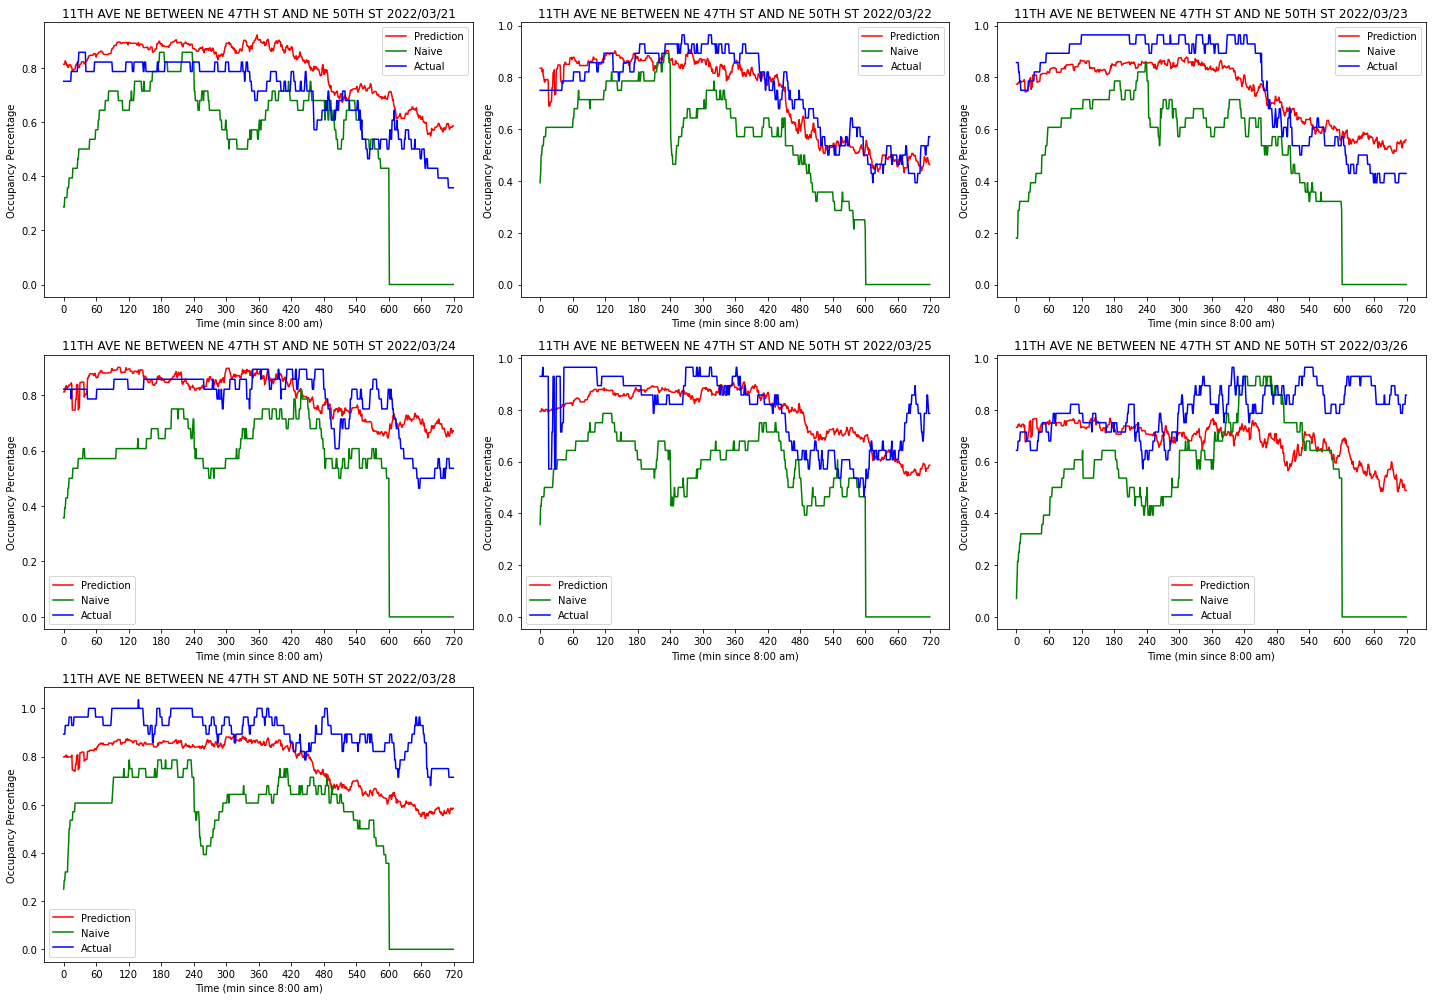

Prediction Error: 
0.09578926890010504
Naive Error: 
0.28093154761904765


In [8]:
lambda_val = 0.1
gamma = 0.01

rrg = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
cross_validate(rrg, blocks_X[0], blocks_Y[0], block_names[0])

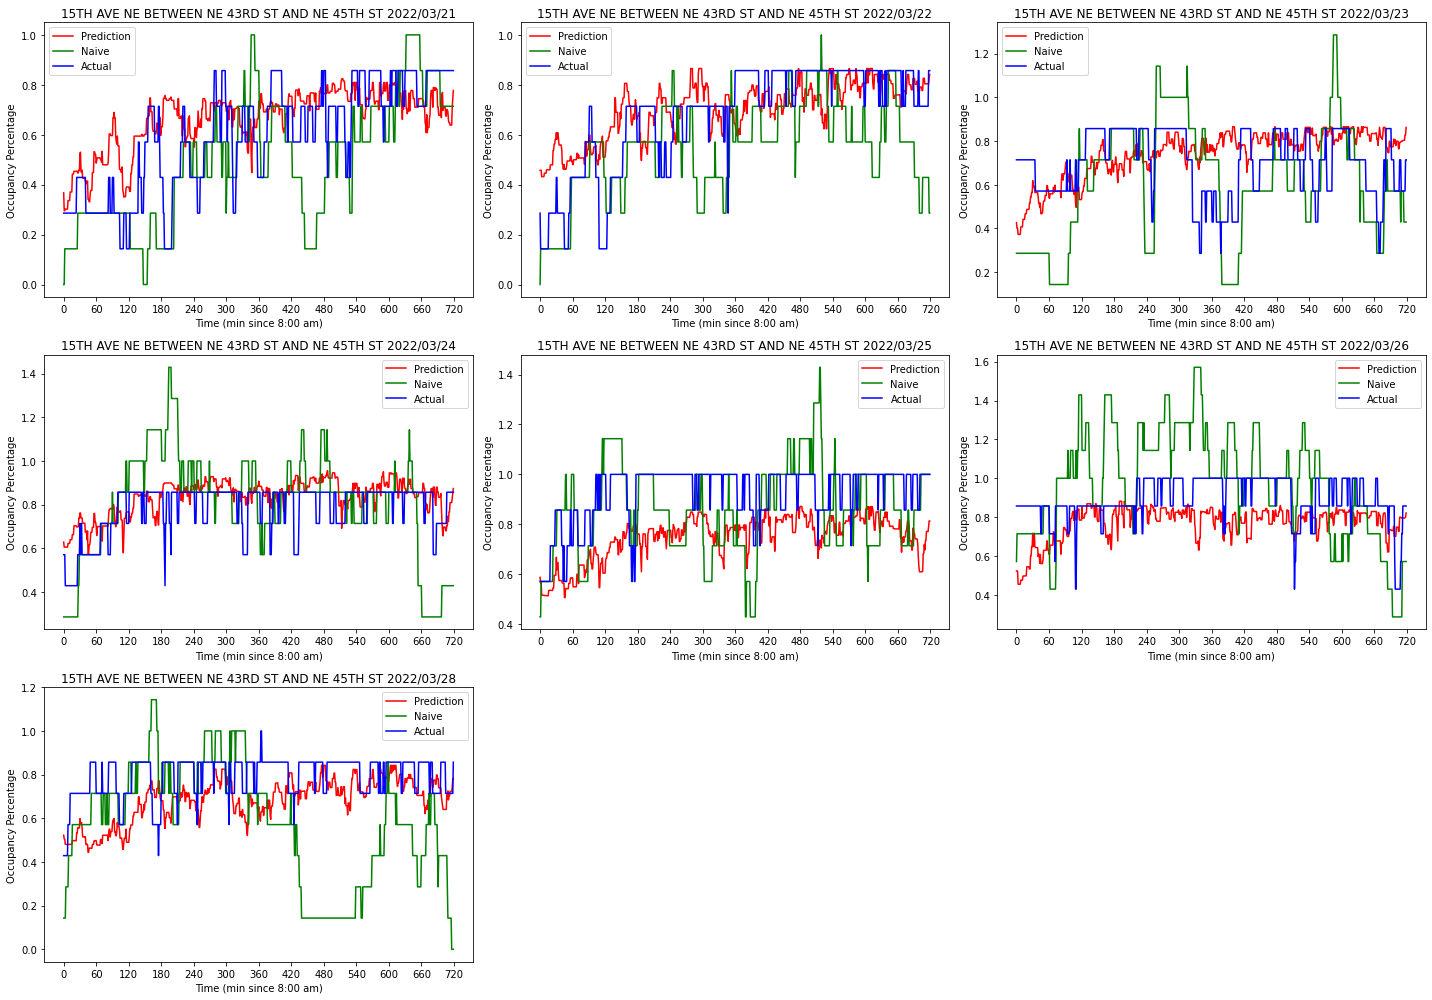

Prediction Error: 
0.13551764795056048
Naive Error: 
0.18532400793650797


In [9]:
lambda_val = 0.1
gamma = 0.001

rrg = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
cross_validate(rrg, blocks_X[1], blocks_Y[1], block_names[1])

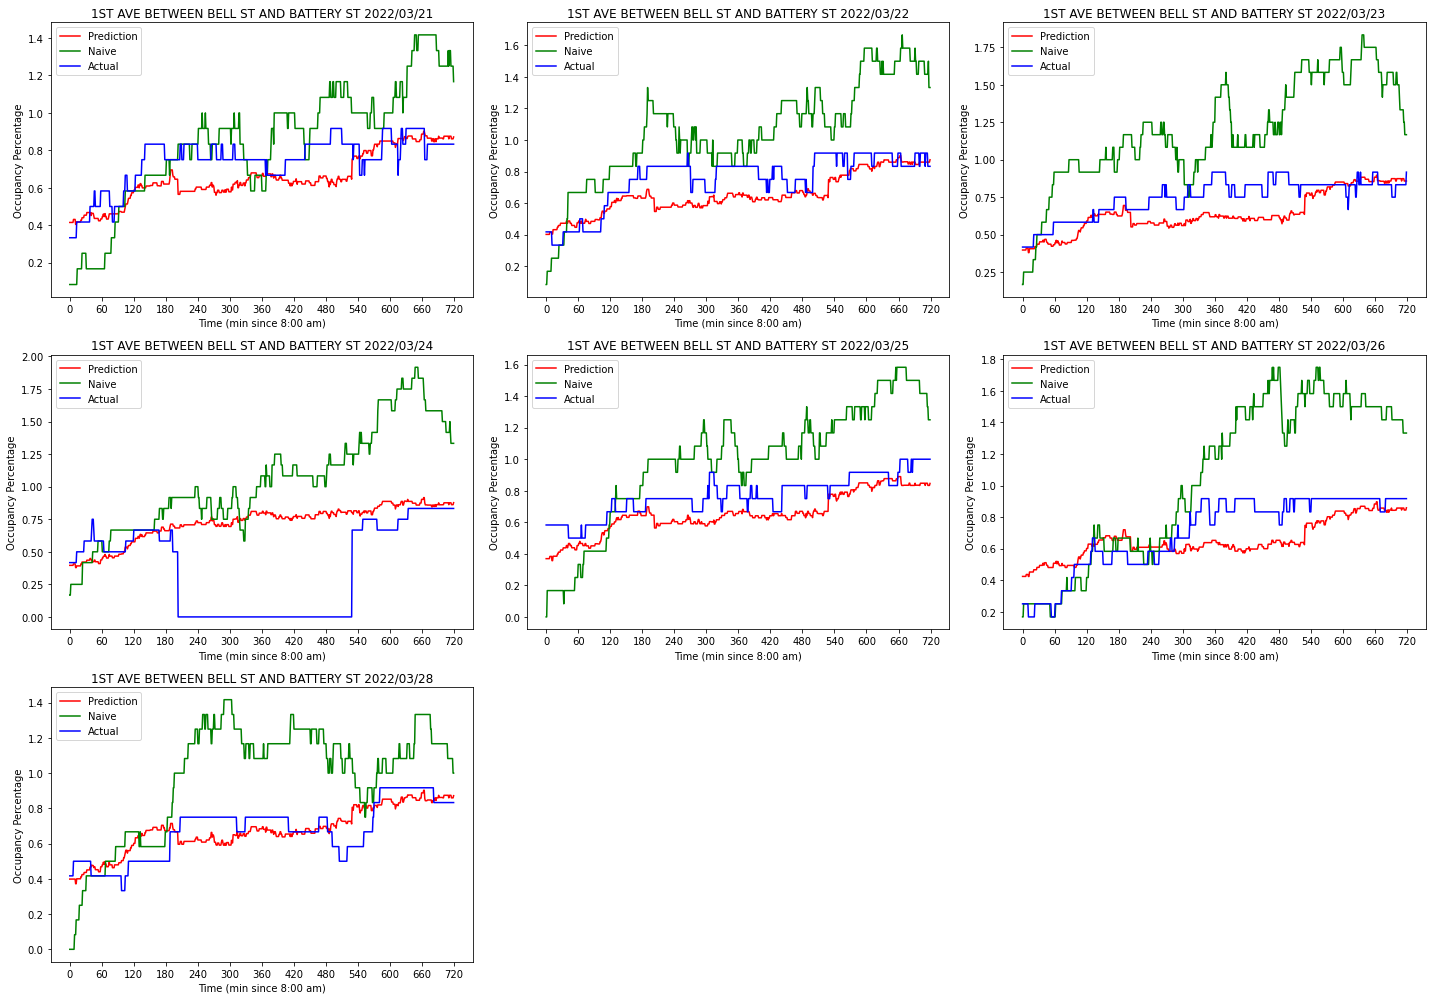

Prediction Error: 
0.1561752169507085
Naive Error: 
0.3808710317460318


In [10]:
lambda_val = 0.1
gamma = 0.0001

rrg = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
cross_validate(rrg, blocks_X[2], blocks_Y[2], block_names[2])

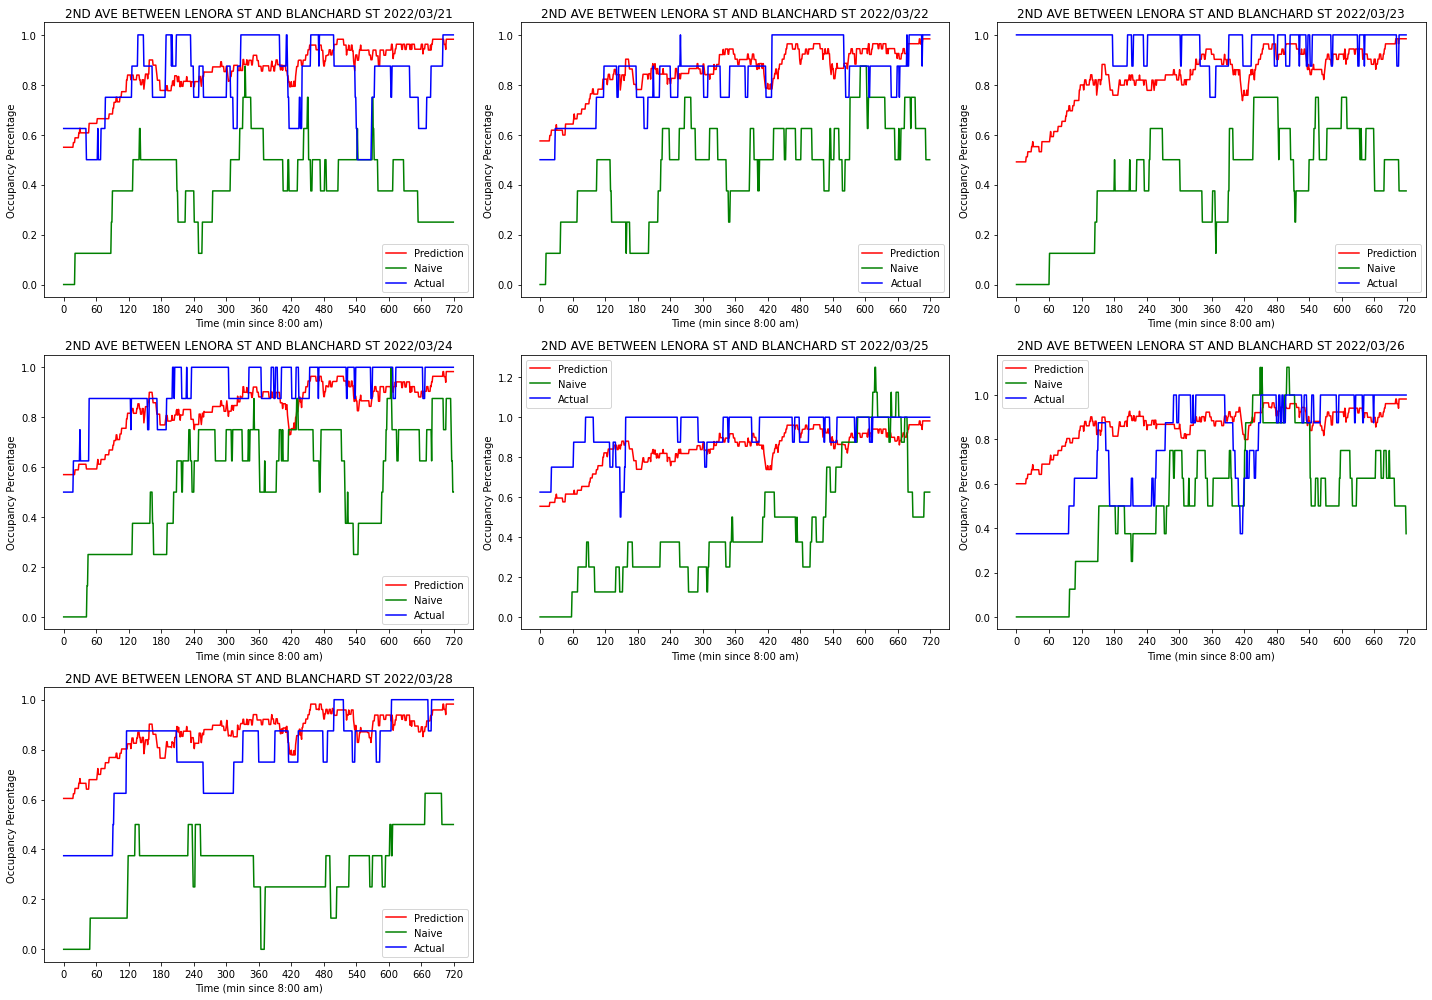

Prediction Error: 
0.11819868688812532
Naive Error: 
0.4281498015873016


In [11]:
lambda_val = 0.1
gamma = 0.0001

rrg = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
cross_validate(rrg, blocks_X[3], blocks_Y[3], block_names[3])

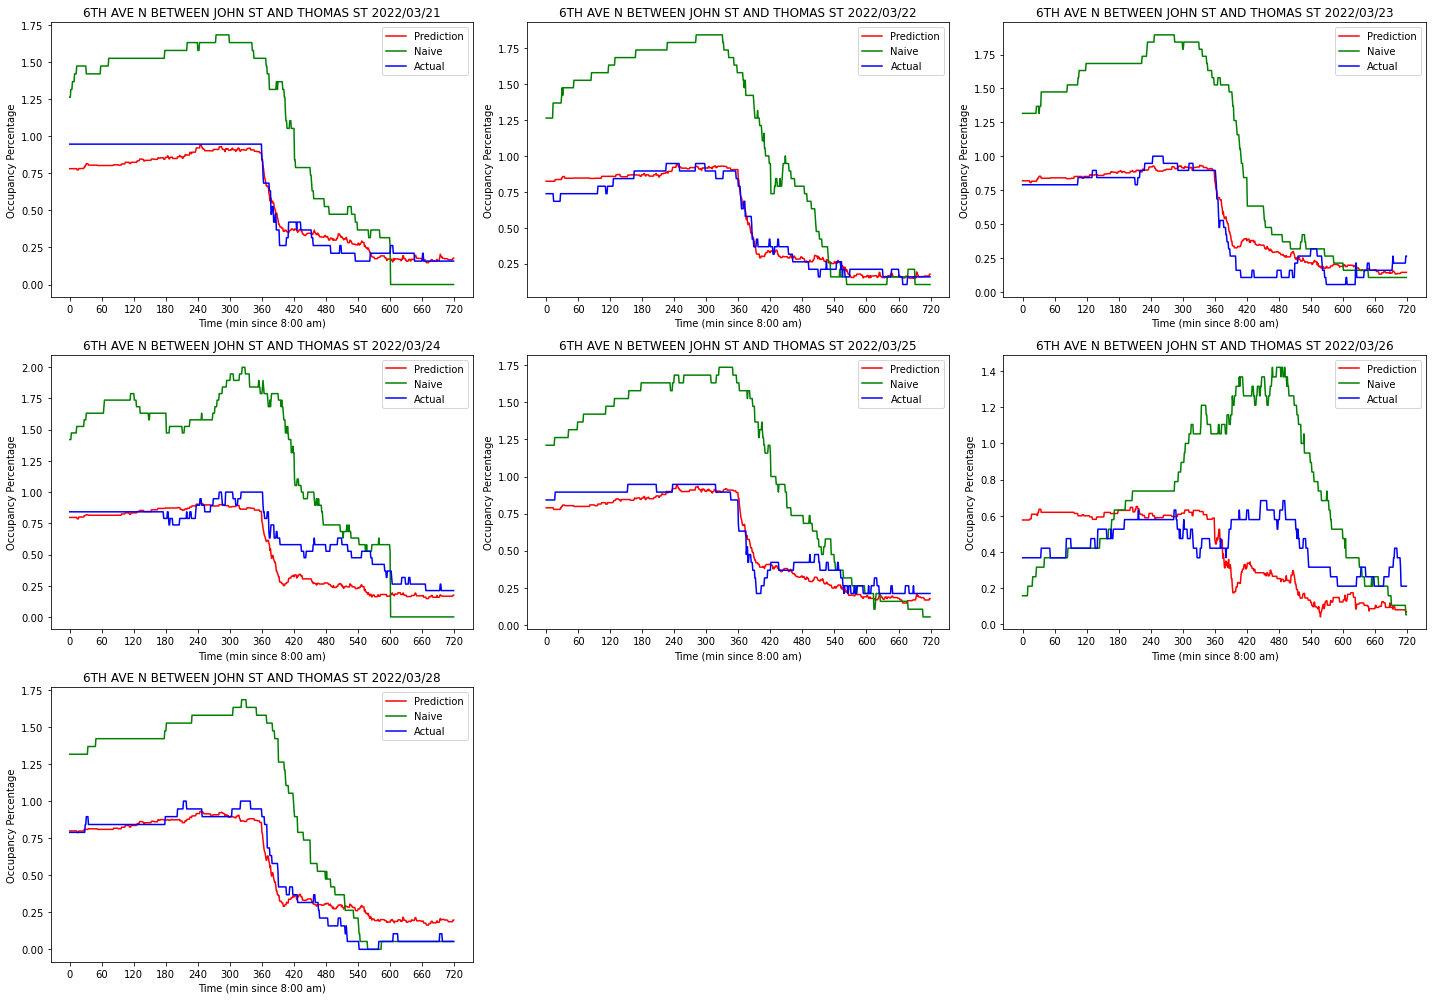

Prediction Error: 
0.09241033733311883
Naive Error: 
0.4814603174603175


In [12]:
lambda_val = 0.1
gamma = 0.001

rrg = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
cross_validate(rrg, blocks_X[4], blocks_Y[4], block_names[4])

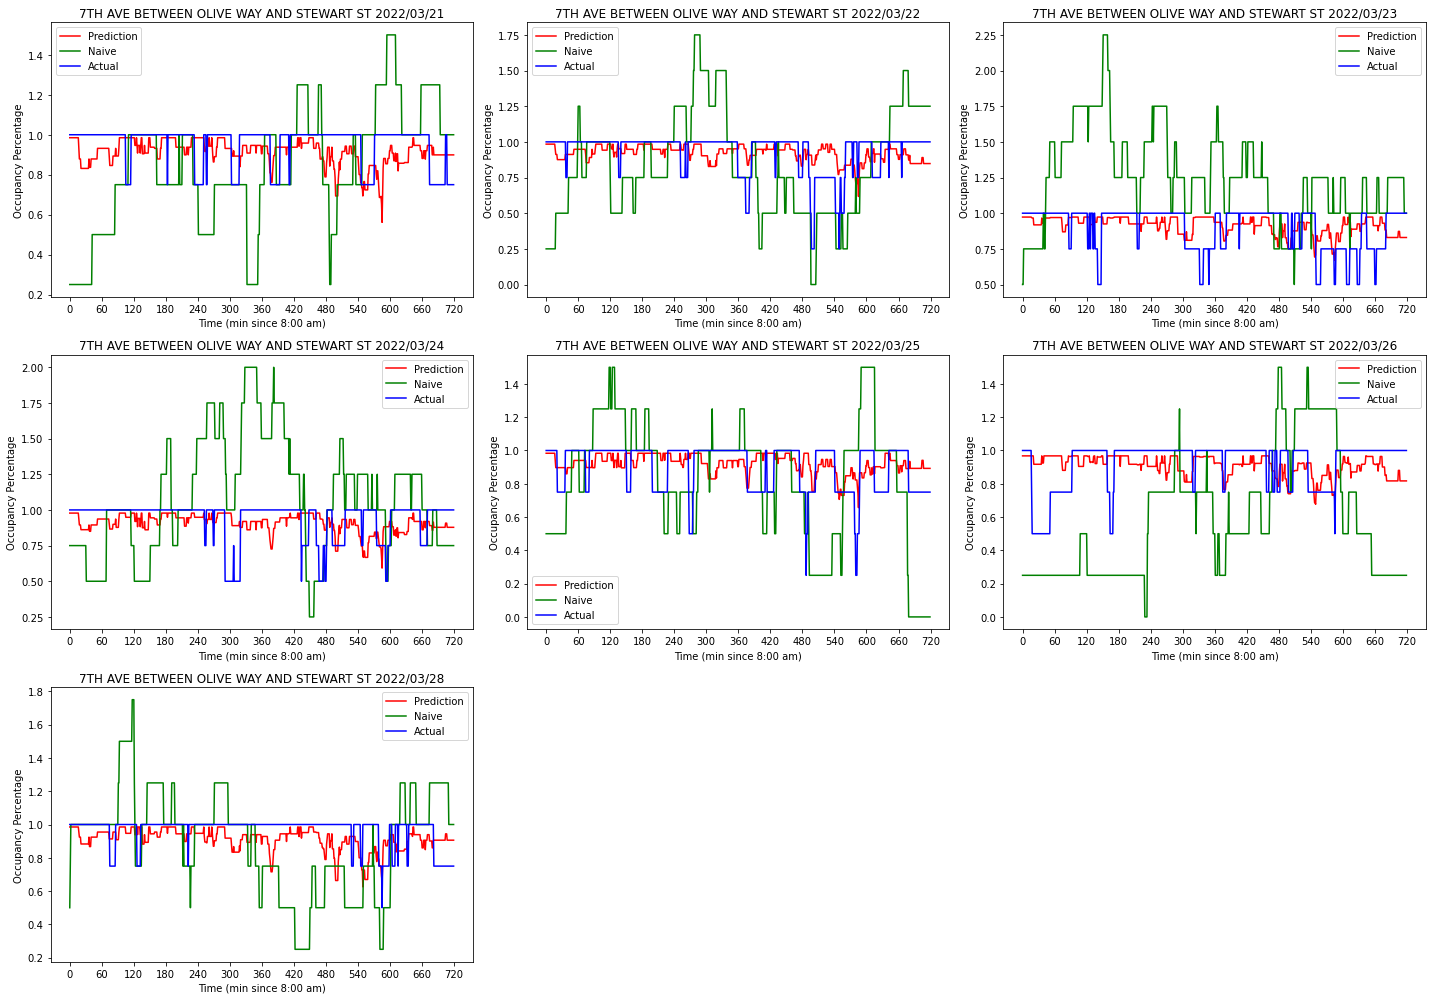

Prediction Error: 
0.10789636155643399
Naive Error: 
0.3247519841269842


In [13]:
lambda_val = 0.1
gamma = 0.0001

rrg = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
cross_validate(rrg, blocks_X[5], blocks_Y[5], block_names[5])

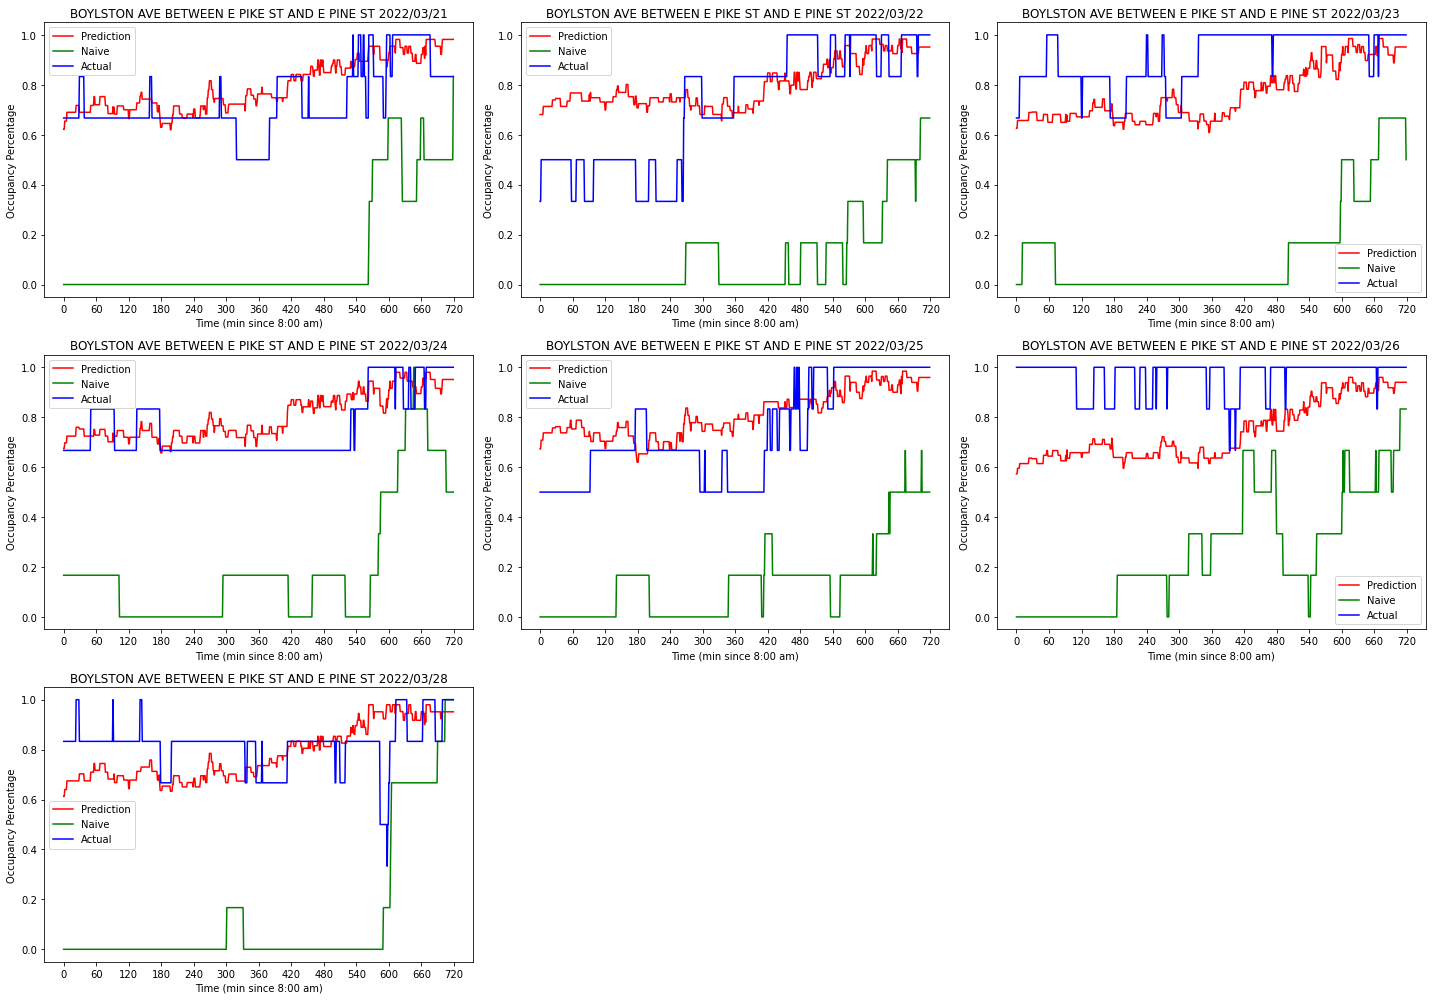

Prediction Error: 
0.13978457819825313
Naive Error: 
0.6543720238095238


In [14]:
lambda_val = 0.1
gamma = 0.001

rrg = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
cross_validate(rrg, blocks_X[6], blocks_Y[6], block_names[6])

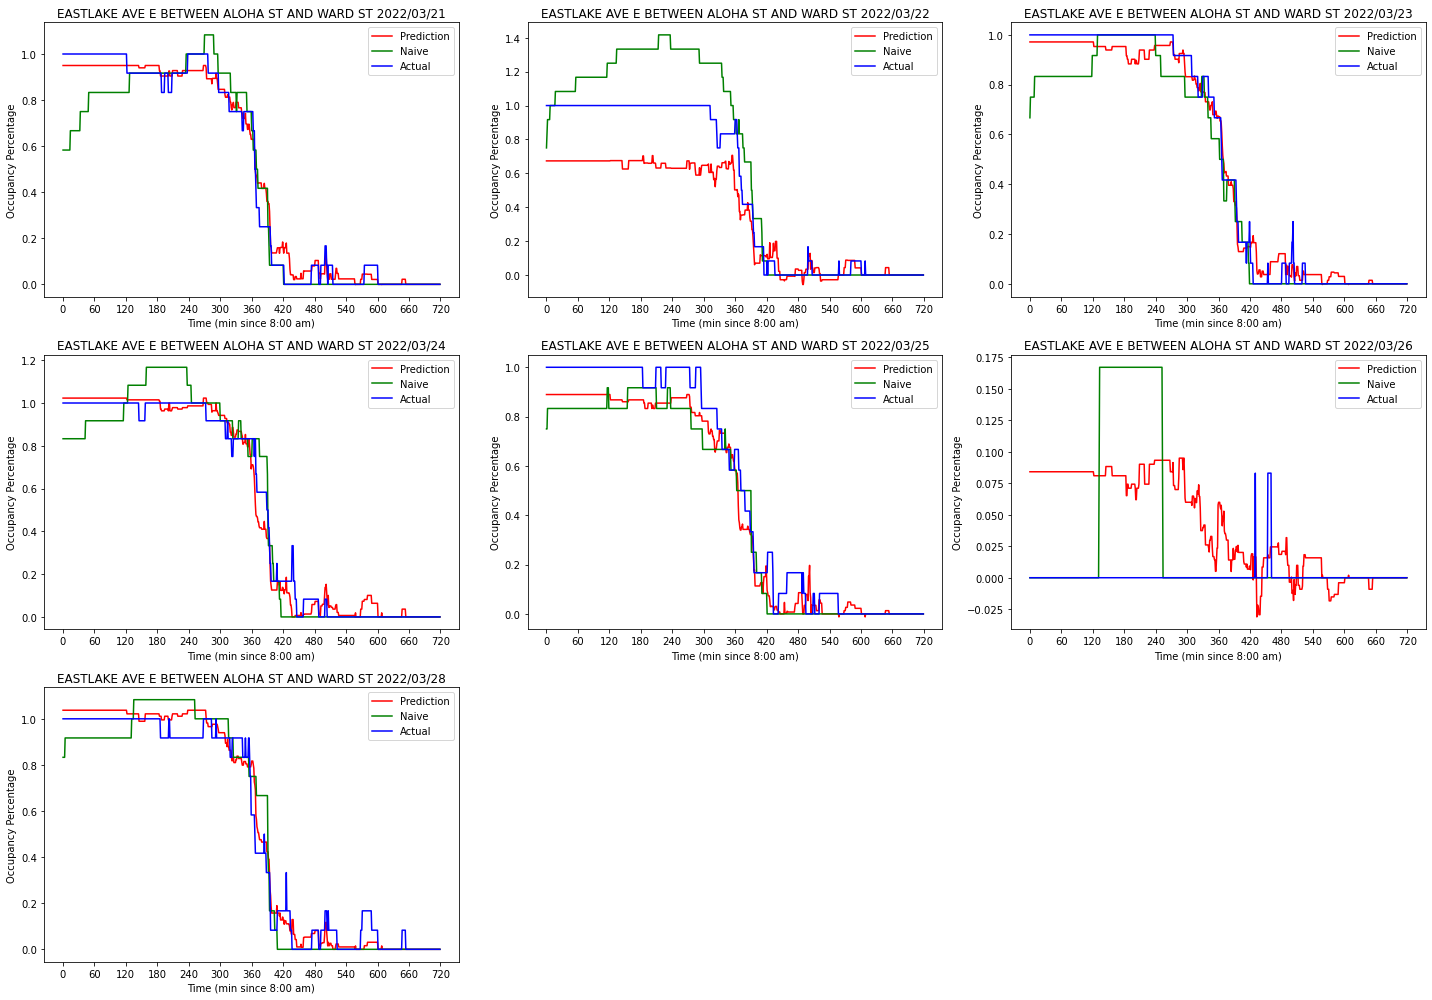

Prediction Error: 
0.06659135313393616
Naive Error: 
0.07648492063492064


In [15]:
lambda_val = 0.1
gamma = 0.01

rrg = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
cross_validate(rrg, blocks_X[7], blocks_Y[7], block_names[7])

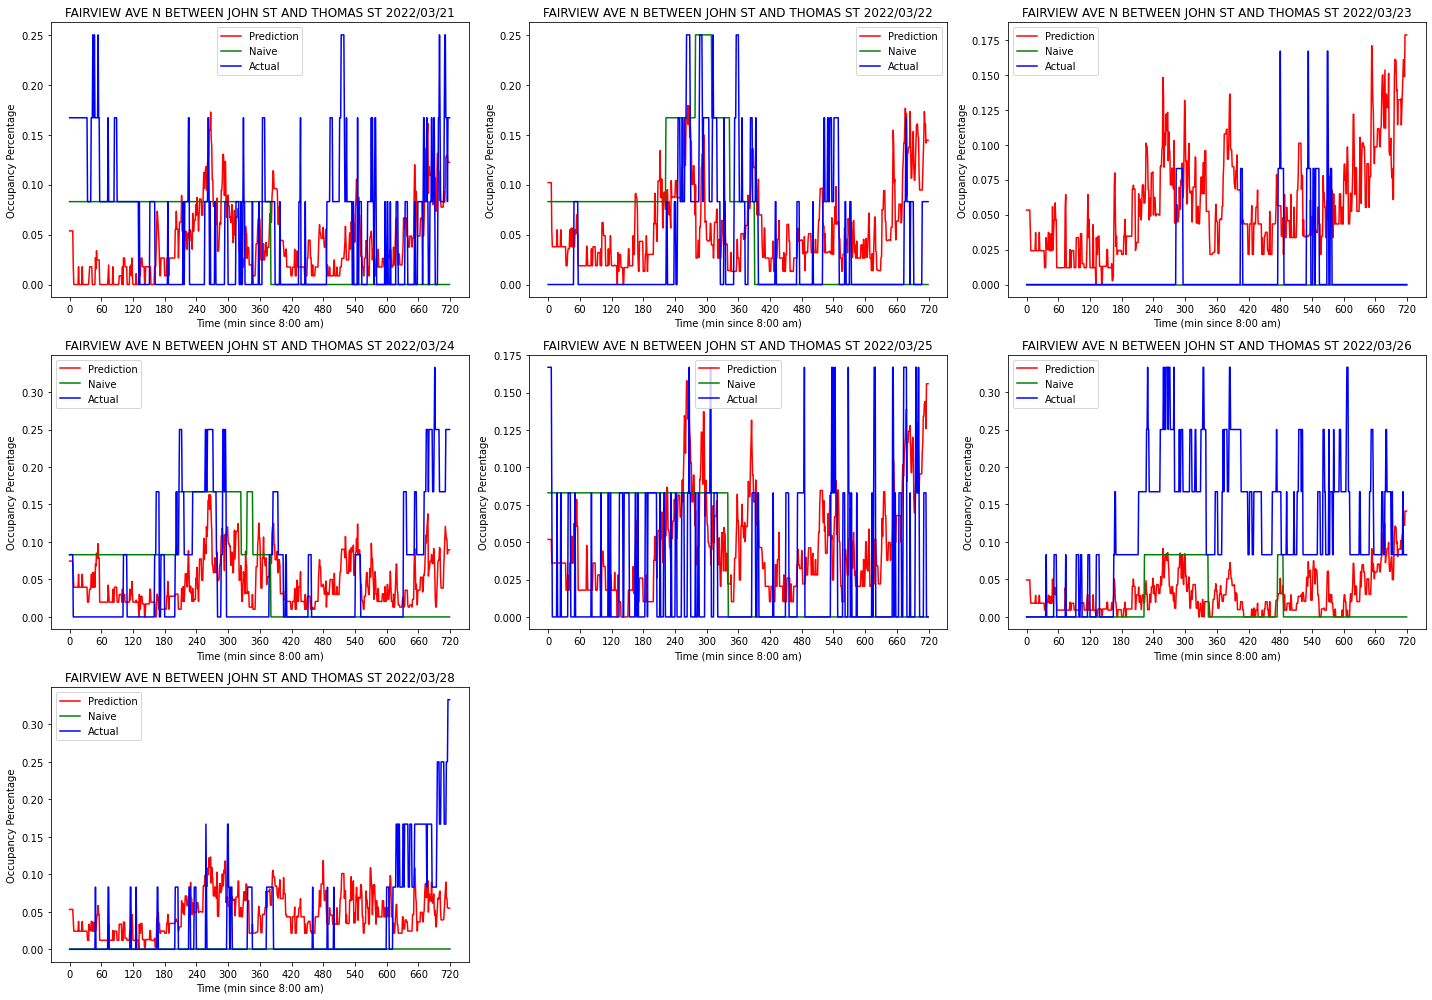

Prediction Error: 
0.06042932360258856
Naive Error: 
0.0511579365079365


In [16]:
lambda_val = 0.1
gamma = 0.01

rrg = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
cross_validate(rrg, blocks_X[8], blocks_Y[8], block_names[8])

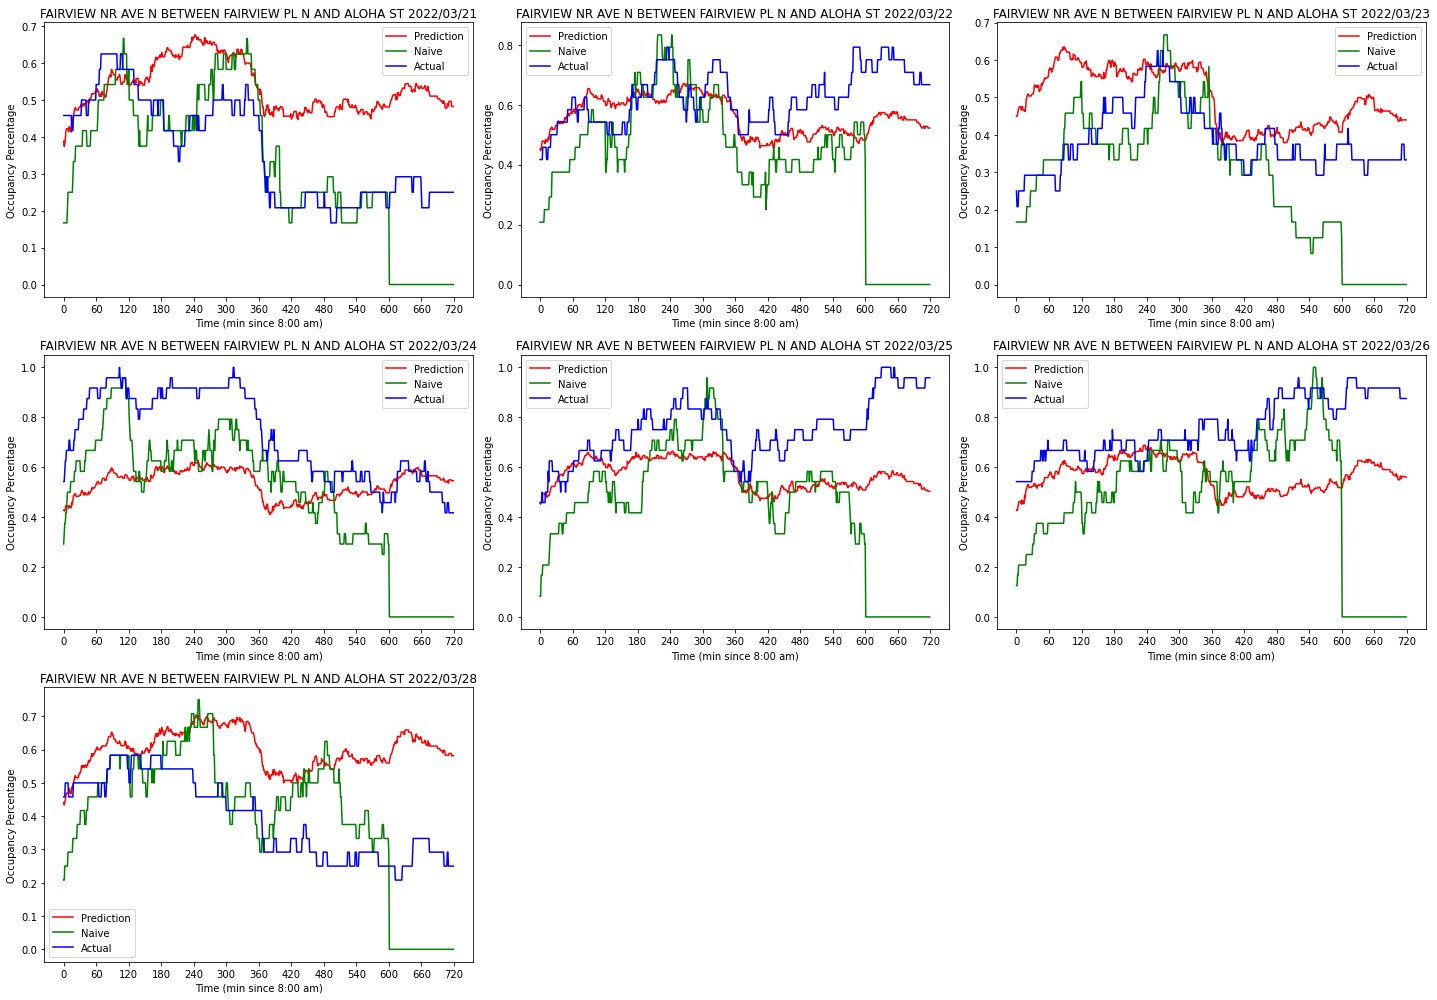

Prediction Error: 
0.16858812518650454
Naive Error: 
0.2034998015873016


In [17]:
lambda_val = 0.1
gamma = 0.001

rrg = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
cross_validate(rrg, blocks_X[9], blocks_Y[9], block_names[9])

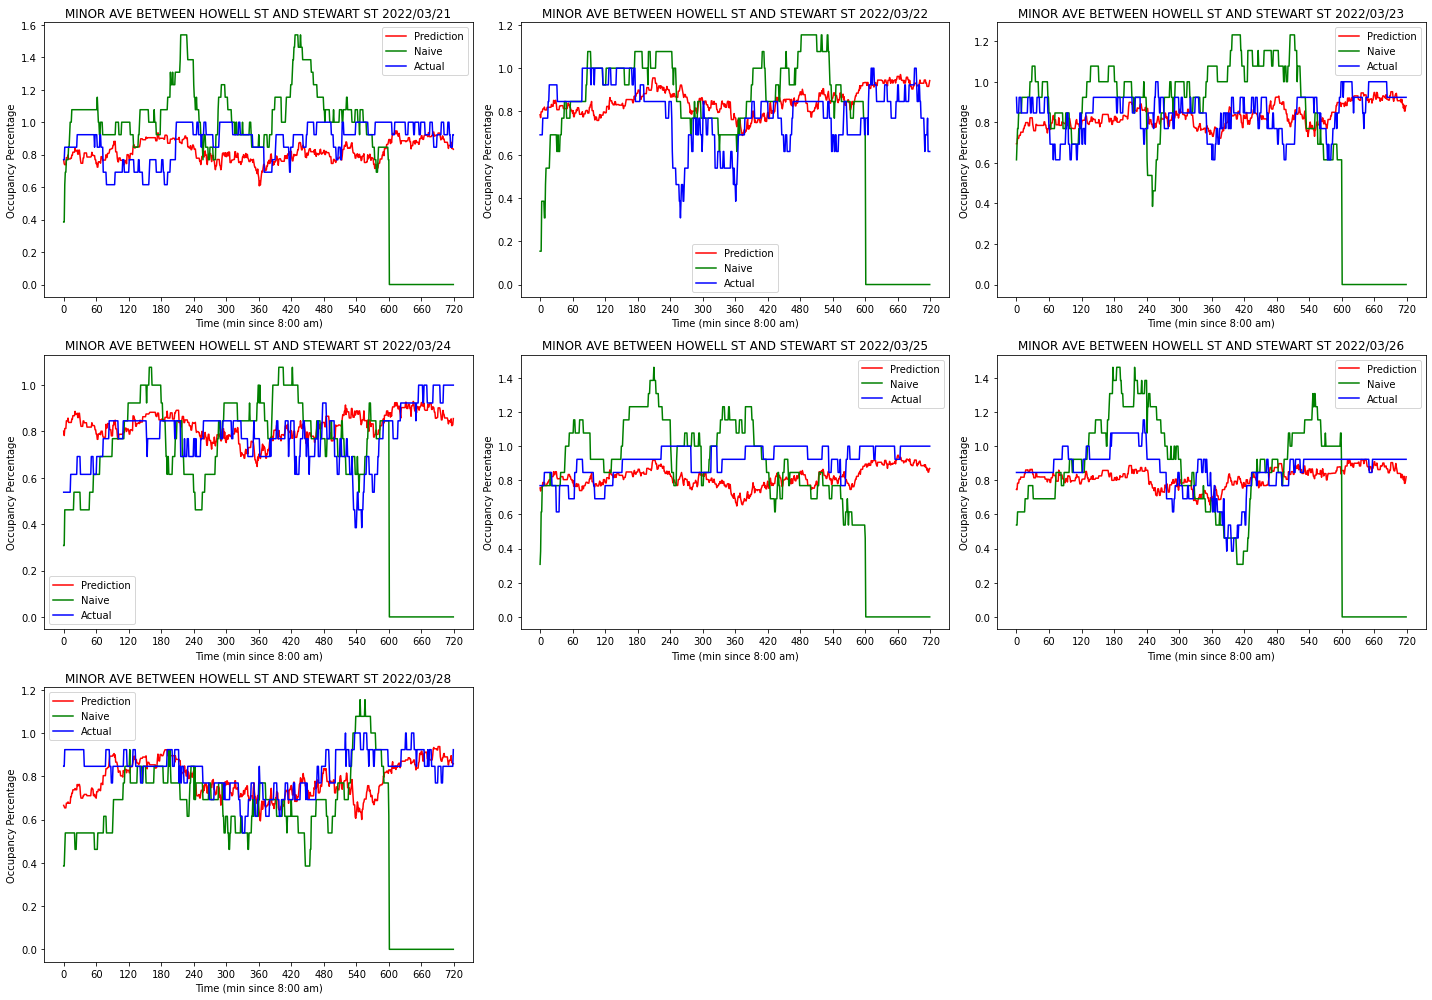

Prediction Error: 
0.10344623312313675
Naive Error: 
0.28984722222222226


In [18]:
lambda_val = 0.1
gamma = 0.001

rrg = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
cross_validate(rrg, blocks_X[10], blocks_Y[10], block_names[10])

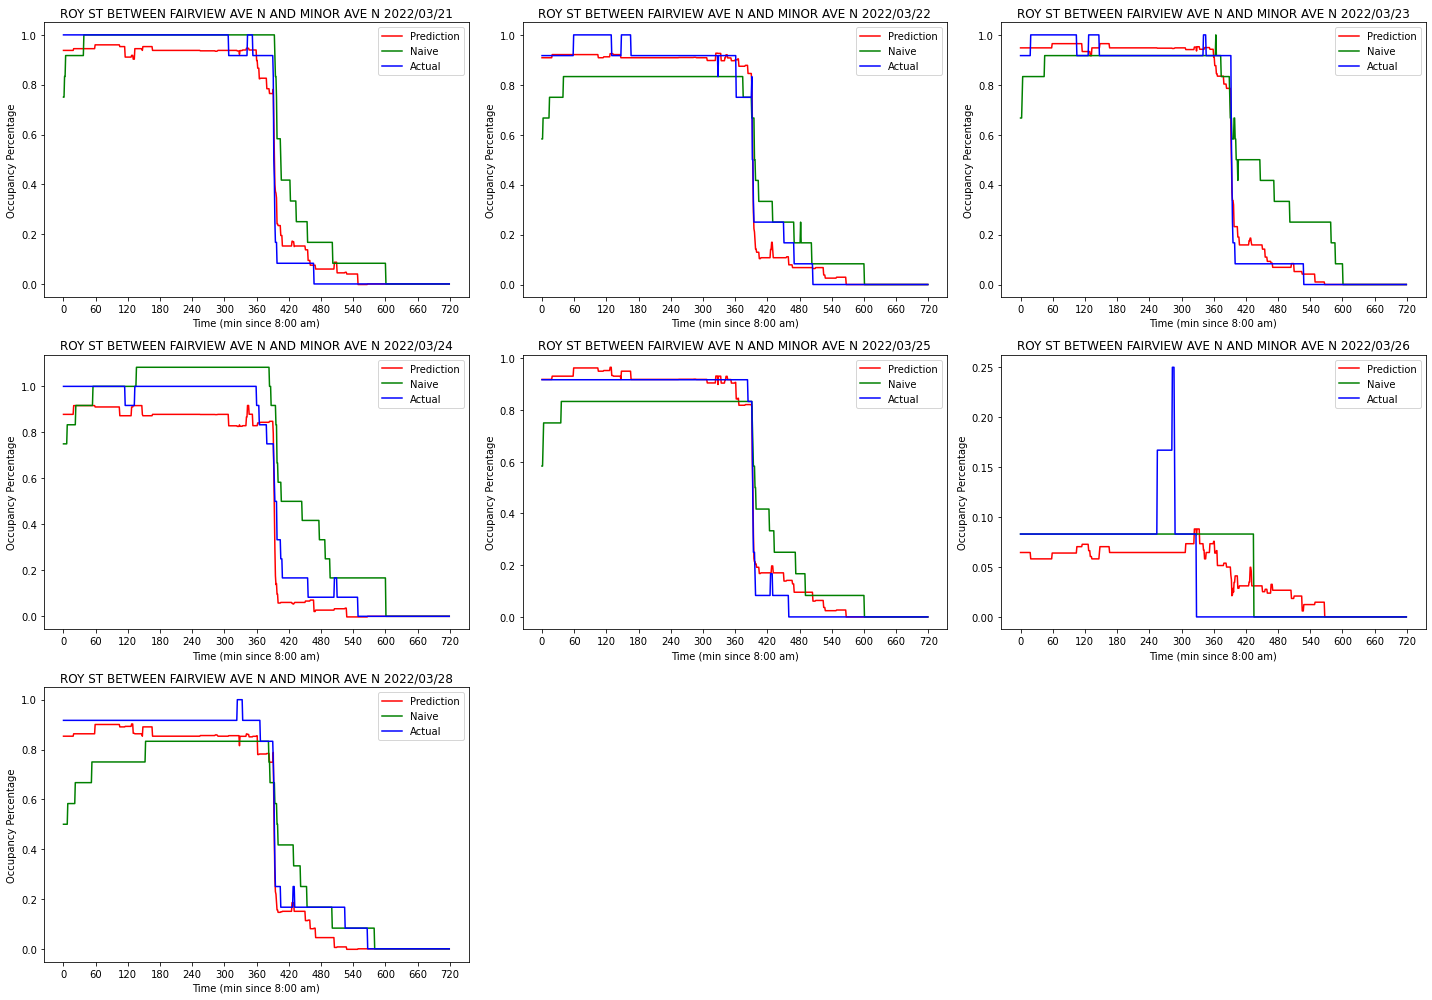

Prediction Error: 
0.04216842393484588
Naive Error: 
0.08020019841269842


In [19]:
lambda_val = 0.1
gamma = 0.01

rrg = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
cross_validate(rrg, blocks_X[11], blocks_Y[11], block_names[11])

## Correlated Blocks

### Step Function

In [20]:
x_step = np.vstack((blocks_X[7], blocks_X[11]))
y_step = np.vstack((blocks_Y[7], blocks_Y[11]))
blocks_step = np.concatenate((block_names[7], block_names[11]))
print(x_step.shape)

(14, 720)


In [21]:
lambda_val = 0.1
gamma = 0.01

rrg = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)

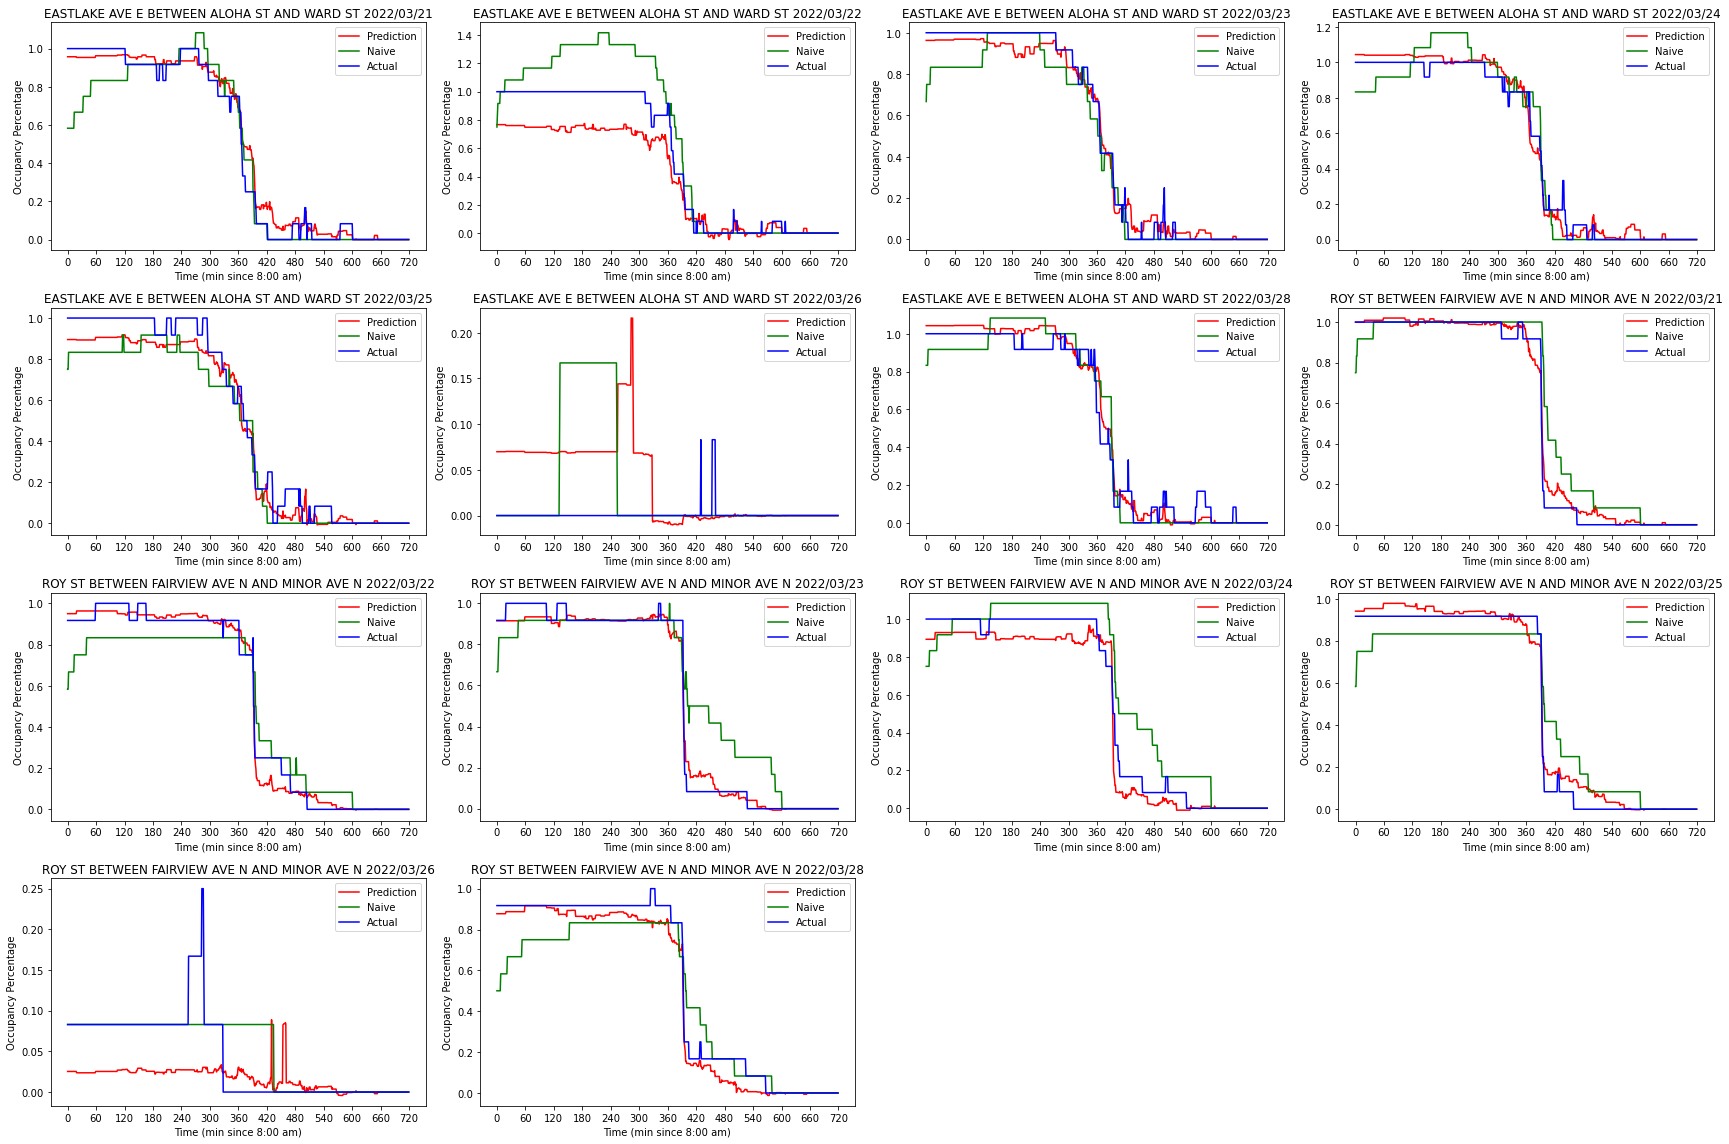

Prediction Error: 
0.04959279681128135
Naive Error: 
0.07834255952380953


In [22]:
time = np.arange(720)
plt.figure(figsize=(24,16))
error = 0
naive_error = 0
for i in range(14):
    x_train = np.delete(x_step, i, 0)
    y_train = np.delete(y_step, i, 0)
    x_test = x_step[i]
    y_test = y_step[i]
    rrg.fit(x_train, y_train)
    y_predicted = rrg.predict(x_test.reshape(1, -1))[0]
    plt.subplot(4, 4, i+1)
    plt.plot(time, y_predicted, color='r', label='Prediction')
    plt.plot(time, x_step[i], color='g', label='Naive')
    plt.plot(time, y_step[i], color='b', label='Actual')
    plt.legend()
    plt.xlabel('Time (min since 8:00 am)')
    plt.xticks(np.arange(0,780,60))
    plt.ylabel('Occupancy Percentage')
    plt.title(blocks_step[i])
    error += np.mean(np.abs(y_test-y_predicted))
    naive_error += np.mean(np.abs(y_test-x_test))
    
plt.tight_layout()
plt.show()
print("Prediction Error: ")
print(error/14)
print("Naive Error: ")
print(naive_error/14)